### Problem Statement:

multiclass classification problem. You have been provided with a dataset named **`"dry_bean_dataset.xlsx"`**, which includes various features of dry beans to predict their class. The dataset comprises the following columns:

- `area:` The area of a bean zone and the number of pixels within its boundaries.
- `perimeter:` Bean circumference is defined as the length of its border.
- `majorAxisLength:` The distance between the ends of the longest line that can be drawn from a bean.
- `minorAxisLength:` The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- `aspectRatio:` Defines the relationship between the major and minor axis lengths.
- `eccentricity:` Eccentricity of the ellipse having the same moments as the region.
- `convexArea:` Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- `equivDiameter:` The diameter of a circle having the same area as a bean seed area.
- `extent:` The ratio of the pixels in the bounding box to the bean area.
- `solidity:` Also known as convexity, the ratio of the pixels in the convex shell to those found in beans.
- `roundness:` Calculated with the formula: (4 * π * Area) / (Perimeter^2).
- `compactness:` Measures the roundness of an object: EquivalentDiameter / MajorAxisLength.
- `shapeFactor1:` The ratio of Area to the square of Perimeter.
- `shapeFactor2:` The ratio of Area to the square of MajorAxisLength.
- `shapeFactor3:` The ratio of Area to the product of MajorAxisLength and MinorAxisLength.
- `shapeFactor4:` The ratio of Perimeter to the product of MajorAxisLength and MinorAxisLength.
- `class:` The class of the bean (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, and Sira).

Your task is to use this dataset to build and evaluate a Logistic Regression model to classify the beans into their respective classes.

### Dataset Citation
This dataset is used under citation guidelines from the original authors. For detailed study and dataset description, see the following references:

- **Citation**: KOKLU, M. and OZKAN, I.A., (2020), Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques. Computers and Electronics in Agriculture, 174, 105507. DOI: https://doi.org/10.1016/j.compag.2020.105507 
- **Dataset available at**: [Murat Koklu's Dataset Page](https://www.muratkoklu.com/datasets/)

**Import Necessary Libraries**

In [42]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



### Task 1: Data Preparation and Exploration

1. Import the data from the `"dry_bean_dataset.xlsx"` file and store it in a DataFrame.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset and handle them appropriately.
5. Check the distribution of classes in the target variable.
6. Visualize the distribution of features `(area, perimeter, major_axis_length, minor_axis_length)` using scatter plots.

In [59]:
# Step 1: Import the data
df = pd.read_excel("datasets\\dry_bean_dataset.xlsx")

# Step 2: Display the number of rows and columns
print(df.shape)
print(df.describe())
# Step 3: Display the first few rows of the dataset
df.head()

(13611, 17)
                area     perimeter  major_axis_length  minor_axis_length  \
count   13611.000000  13611.000000       13611.000000       13611.000000   
mean    53048.284549    855.283459         320.141867         202.270714   
std     29324.095717    214.289696          85.694186          44.970091   
min     20420.000000    524.736000         183.601165         122.512653   
25%     36328.000000    703.523500         253.303633         175.848170   
50%     44652.000000    794.941000         296.883367         192.431733   
75%     61332.000000    977.213000         376.495012         217.031741   
max    254616.000000   1985.370000         738.860153         460.198497   

       aspect_ratio  eccentricity    convex_area  equiv_diameter  \
count  13611.000000  13611.000000   13611.000000    13611.000000   
mean       1.583242      0.750895   53768.200206      253.064220   
std        0.246678      0.092002   29774.915817       59.177120   
min        1.024868      0.2189

,area,perimeter,major_axis_length,minor_axis_length,aspect_ratio,eccentricity,convex_area,equiv_diameter,extent,solidity,roundness,compactness,shape_factor1,shape_factor2,shape_factor3,shape_factor4,class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
# Step 4: Check for any missing values
df.isna().sum()

area                 0
perimeter            0
major_axis_length    0
minor_axis_length    0
aspect_ratio         0
eccentricity         0
convex_area          0
equiv_diameter       0
extent               0
solidity             0
roundness            0
compactness          0
shape_factor1        0
shape_factor2        0
shape_factor3        0
shape_factor4        0
class                0
dtype: int64

In [20]:
# Step 5: Check the distribution of classes in the target variable


classes = df["class"].unique().tolist()
df["class"].value_counts()

class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [21]:
classes

['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']

In [10]:
# Step 6: Visualize the distribution of features (area, perimeter, major_axis_length, minor_axis_length) using scatter plots.
features = ['area', 'perimeter', 'major_axis_length', 'minor_axis_length']

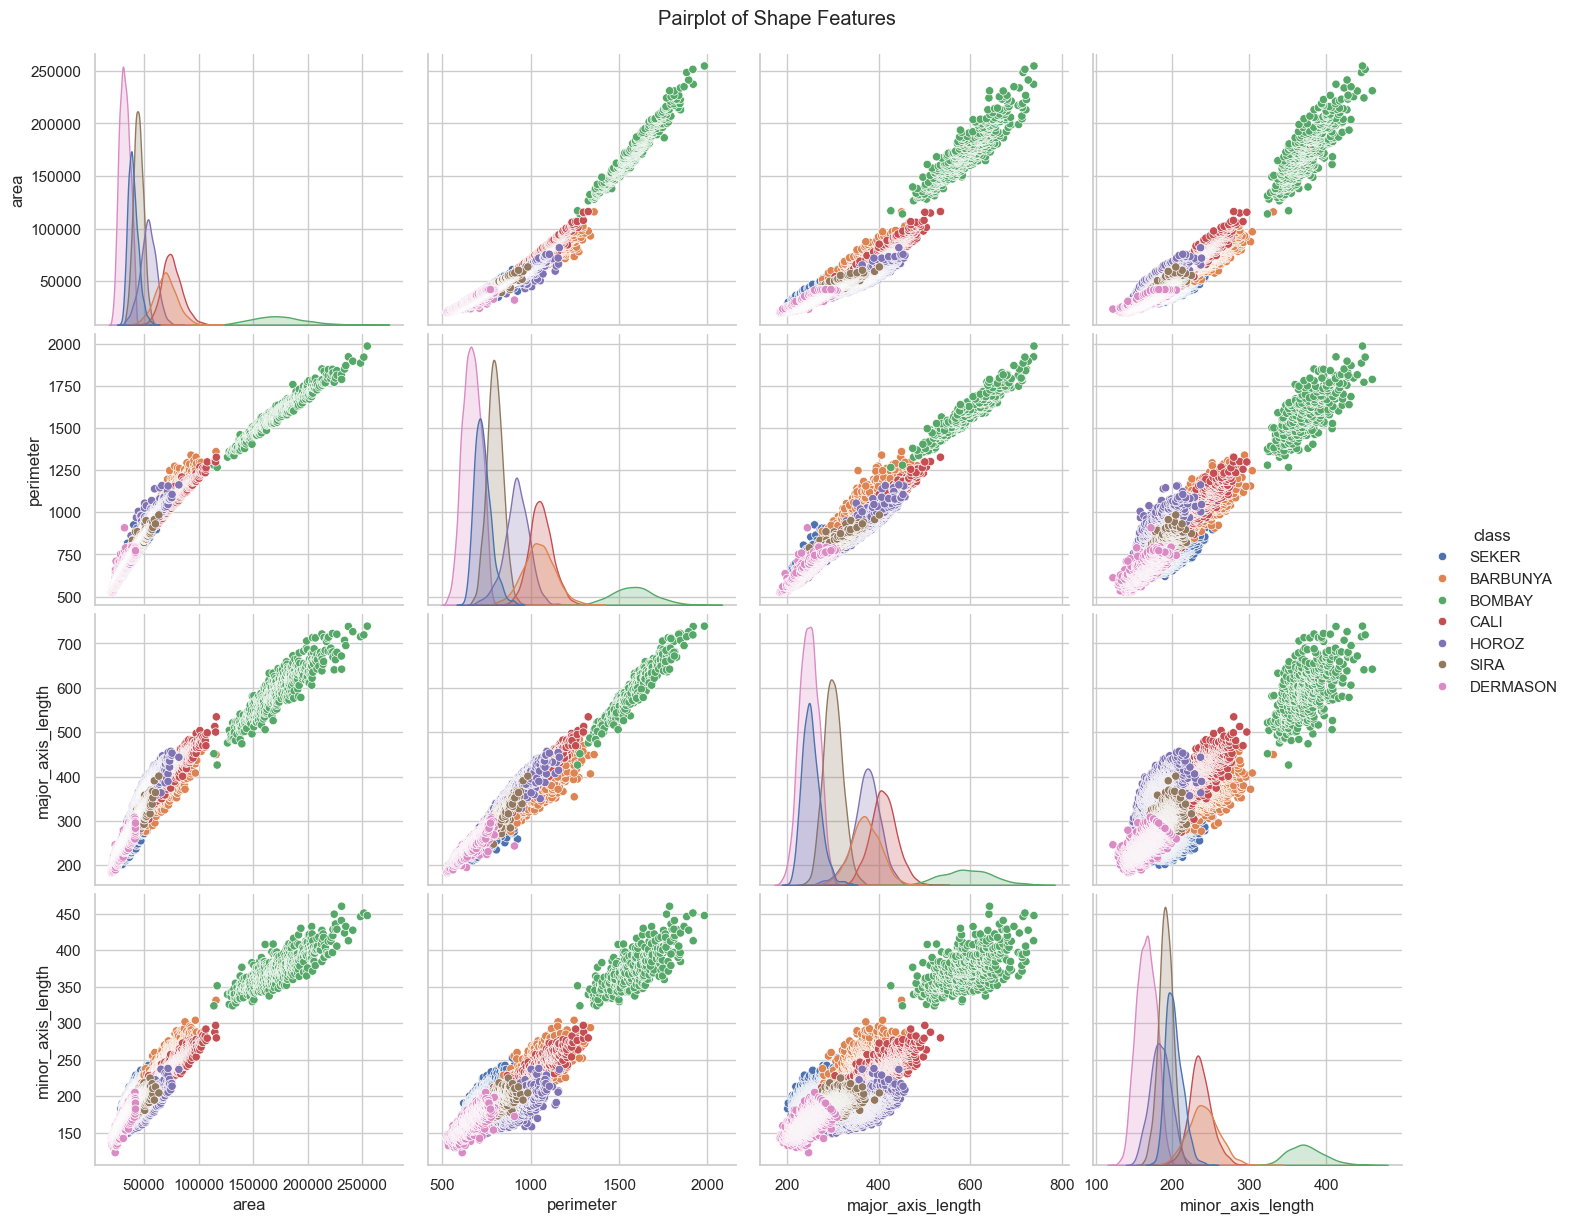

In [29]:
sns.set_theme(style='whitegrid')
sns.pairplot(df, vars=features, hue="class", height=3, aspect=1.2, diag_kind='kde')
plt.suptitle("Pairplot of Shape Features", y=1.02)
plt.show()


### Task 2: Data Preprocessing

1. Select the features (all columns except 'class') and the target variable for modeling.
   
2. Split the data into training and testing sets with a test size of 30%.

In [32]:
# Step 1: Select features and target variable
X = df.drop("class", axis=1)
y = df["class"]

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

### Task 3: Model Training and Evaluation Using Logistic Regression

1. Initialize and train a Logistic Regression model using the training data.
2. Make predictions on the test set using the trained model.
3. Evaluate the model using a classification report and print the report.
4. Plot the confusion matrix for the Logistic Regression model.

In [35]:
# Step 1: Initialize and train a Logistic Regression model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model_log_r = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

model_log_r.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [41]:
# Step 2: Make predictions on the test set
m_score = model_log_r.score(X_test, y_test)
print("model score: ",m_score)

y_pred = model_log_r.predict(X_test)

# Step 3: Evaluate the model using a classification report and print the report.
class_report = classification_report(y_pred=y_pred, y_true=y_test)
print(class_report)

model score:  0.9233594515181195
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.88      0.91       397
      BOMBAY       1.00      1.00      1.00       170
        CALI       0.93      0.95      0.94       477
    DERMASON       0.92      0.93      0.92      1076
       HOROZ       0.94      0.95      0.94       547
       SEKER       0.95      0.95      0.95       605
        SIRA       0.87      0.87      0.87       812

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



In [ ]:
conf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)

[[351   0  25   0   1   5  15]
 [  0 170   0   0   0   0   0]
 [ 11   0 452   0   8   0   6]
 [  0   0   0 996   4  10  66]
 [  3   0   7   7 521   0   9]
 [  5   0   0  11   0 575  14]
 [  1   0   3  66  22  14 706]]


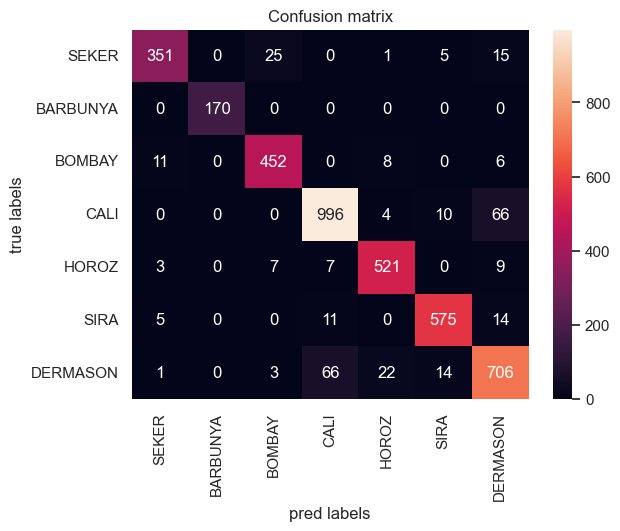

In [60]:
# Step 4: Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel("pred labels")
plt.ylabel('true labels')
plt.title('Confusion matrix')
plt.show()

### Task 4: Train Logistic Regression with Specific Parameters

1. Train a Logistic Regression model with specified parameters:
    - Max iterations: 300
    - Regularization strength (C): 0.5
    - 'tol': 0.001
    - class_weight: 'balanced'
<br></br>

Learn about these parameters here: [scikit-learn LogisticRegression Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

-------------------------------------------------------------------------------------------------------------------------------------------------------



2. Make predictions on the test set using the trained model.
   
3. Evaluate the model using a classification report and print the report.
   
4. Plot the confusion matrix for this Logistic Regression model.


In [51]:
# Step 1: Train a Logistic Regression model with specified parameters
model_log_r_300 = make_pipeline(StandardScaler(), LogisticRegression(max_iter=300, C=0.5, tol=0.001, class_weight="balanced"))
model_log_r_300.fit(X_train, y_train)
# Step 2: Make predictions on the test set
y_pred_r300 = model_log_r_300.predict(X_test)
model_log_r_300.score(X_test, y_test)

0.9204211557296768

In [53]:
# Step 3: Evaluate the model using a classification report
class_300_report = classification_report(y_pred=y_pred_r300, y_true=y_test)
print(class_300_report)

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.92      0.92       397
      BOMBAY       1.00      1.00      1.00       170
        CALI       0.93      0.95      0.94       477
    DERMASON       0.94      0.90      0.92      1076
       HOROZ       0.93      0.96      0.94       547
       SEKER       0.94      0.95      0.95       605
        SIRA       0.85      0.87      0.86       812

    accuracy                           0.92      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084



In [57]:
# Step 4: Plot the confusion matrix
conf_300_matrix = confusion_matrix(y_pred=y_pred_r300, y_true=y_test)
conf_300_matrix

array([[365,   0,  22,   0,   1,   4,   5],
       [  0, 170,   0,   0,   0,   0,   0],
       [ 13,   0, 453,   0,   6,   0,   5],
       [  0,   0,   0, 966,   4,  11,  95],
       [  4,   0,   7,   6, 523,   0,   7],
       [  7,   0,   0,   8,   0, 576,  14],
       [  4,   0,   6,  51,  26,  19, 706]], dtype=int64)

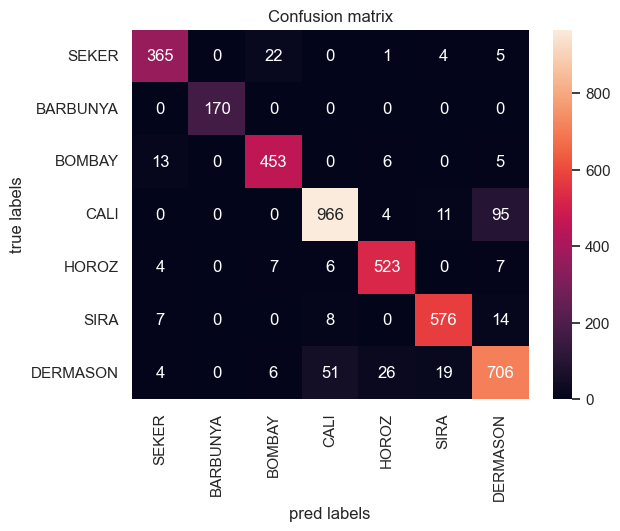

In [62]:

sns.heatmap(conf_300_matrix, annot=True,fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel("pred labels")
plt.ylabel('true labels')
plt.title('Confusion matrix')
plt.show()